In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

In [8]:
import torchxrayvision as xrv

In [10]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/lustre04/scratch/cohenjos/NIH/images-224")


In [11]:
d_nih

{'Atelectasis': {0.0: 29103, 1.0: 1702},
 'Cardiomegaly': {0.0: 30038, 1.0: 767},
 'Consolidation': {0.0: 30378, 1.0: 427},
 'Edema': {0.0: 30723, 1.0: 82},
 'Effusion': {0.0: 29525, 1.0: 1280},
 'Emphysema': {0.0: 30540, 1.0: 265},
 'Fibrosis': {0.0: 30234, 1.0: 571},
 'Hernia': {0.0: 30722, 1.0: 83},
 'Infiltration': {0.0: 27201, 1.0: 3604},
 'Mass': {0.0: 29525, 1.0: 1280},
 'Nodule': {0.0: 29144, 1.0: 1661},
 'Pleural_Thickening': {0.0: 30042, 1.0: 763},
 'Pneumonia': {0.0: 30637, 1.0: 168},
 'Pneumothorax': {0.0: 30536, 1.0: 269}}


NIH_Dataset num_samples=30805

In [12]:
d_nih.csv.iloc[0]

Patient ID                                    1
Image Index                    00000001_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient Age                                058Y
Patient Gender                                M
View Position                                PA
OriginalImage[Width                        2682
Height]                                    2749
OriginalImagePixelSpacing[x               0.143
y]                                        0.143
Unnamed: 11                                 NaN
Name: 0, dtype: object

{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

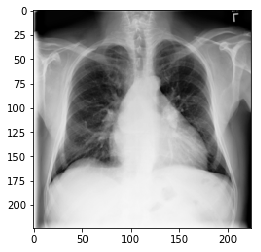

In [13]:
sample = d_nih[0]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [14]:
d_pc = xrv.datasets.PC_Dataset(imgpath="/lustre04/scratch/cohenjos/PC/images-224")


In [18]:
d_pc

{'Atelectasis': {0.0: 59674, 1.0: 2441},
 'Cardiomegaly': {0.0: 56725, 1.0: 5390},
 'Consolidation': {0.0: 61621, 1.0: 494},
 'Edema': {0.0: 62007, 1.0: 108},
 'Effusion': {0.0: 60478, 1.0: 1637},
 'Emphysema': {0.0: 61569, 1.0: 546},
 'Fibrosis': {0.0: 61774, 1.0: 341},
 'Fracture': {0.0: 60450, 1.0: 1665},
 'Hernia': {0.0: 61127, 1.0: 988},
 'Infiltration': {0.0: 57677, 1.0: 4438},
 'Mass': {0.0: 61608, 1.0: 507},
 'Nodule': {0.0: 59921, 1.0: 2194},
 'Pleural_Thickening': {0.0: 60039, 1.0: 2076},
 'Pneumonia': {0.0: 60064, 1.0: 2051},
 'Pneumothorax': {0.0: 62017, 1.0: 98}}


PC_Dataset num_samples=62115

In [19]:
tr = xrv.datasets.XRayResizer(224)

In [21]:
data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

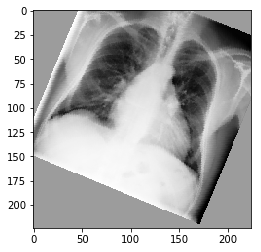

In [25]:
a = data_transforms(tr(sample["PA"]))
plt.imshow(a[0], cmap="Greys_r")

In [28]:
d_chex = xrv.datasets.CheX_Dataset(imgpath="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small",
                                   csvpath="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small/train.csv")


In [29]:
d_chex

{'Atelectasis': {0.0: 14317, 1.0: 12691},
 'Cardiomegaly': {0.0: 17765, 1.0: 9099},
 'Consolidation': {0.0: 22504, 1.0: 5390},
 'Edema': {0.0: 20615, 1.0: 14929},
 'Effusion': {0.0: 23500, 1.0: 20640},
 'Enlarged Cardiomediastinum': {0.0: 20506, 1.0: 5181},
 'Fracture': {0.0: 14948, 1.0: 4250},
 'Lung Lesion': {0.0: 14422, 1.0: 4217},
 'Lung Opacity': {0.0: 15675, 1.0: 30873},
 'Pleural Other': {0.0: 14086, 1.0: 1572},
 'Pneumonia': {0.0: 14793, 1.0: 2822},
 'Pneumothorax': {0.0: 32685, 1.0: 4311},
 'Support Devices': {0.0: 15734, 1.0: 25883}}


CheX_Dataset num_samples=64534

In [32]:
d_nih2 = xrv.datasets.NIH_Google_Dataset(imgpath="/lustre04/scratch/cohenjos/NIH/images-224")


In [33]:
d_nih2

{'Fracture': {0.0: 1635, 1.0: 60},
 'Lung Opacity': {0.0: 1094, 1.0: 601},
 'Nodule or mass': {0.0: 1463, 1.0: 232},
 'Pneumothorax': {0.0: 1623, 1.0: 72}}


NIH_Google_Dataset num_samples=1695

{'Atelectasis': 1.0, 'Cardiomegaly': 0.0, 'Consolidation': 0.0, 'Edema': 0.0}

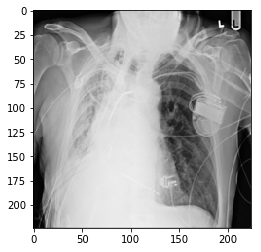

In [34]:
sample = d_nih2[0]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [4]:
d_mimic_chex = datasets.xray.MIMIC_XrayDataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          datadir="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-chexpert.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz")


In [5]:
d_mimic_chex

{'Atelectasis': [(0.0, 30954), (1.0, 4077)],
 'Cardiomegaly': [(0.0, 32312), (1.0, 3743)],
 'Consolidation': [(0.0, 32297), (1.0, 816)],
 'Edema': [(0.0, 33610), (1.0, 1157)],
 'Effusion': [(0.0, 33401), (1.0, 3713)],
 'Enlarged Cardiomediastinum': [(0.0, 31505), (1.0, 692)],
 'Fracture': [(0.0, 30961), (1.0, 972)],
 'Lung Lesion': [(0.0, 31033), (1.0, 1321)],
 'Lung Opacity': [(0.0, 31175), (1.0, 5426)],
 'Pleural Other': [(0.0, 30869), (1.0, 465)],
 'Pneumonia': [(0.0, 33347), (1.0, 2176)],
 'Pneumothorax': [(0.0, 33651), (1.0, 560)],
 'Support Devices': [(0.0, 31152), (1.0, 1970)]}


MIMIC_XrayDataset num_samples=45628

In [7]:
d_mimic_negbio = datasets.xray.MIMIC_XrayDataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          datadir="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-negbio.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz")


In [8]:
d_mimic_negbio

{'Atelectasis': [(0.0, 32058), (1.0, 4048)],
 'Cardiomegaly': [(0.0, 33431), (1.0, 3275)],
 'Consolidation': [(0.0, 33564), (1.0, 762)],
 'Edema': [(0.0, 34731), (1.0, 1121)],
 'Effusion': [(0.0, 34489), (1.0, 3595)],
 'Enlarged Cardiomediastinum': [(0.0, 32641), (1.0, 660)],
 'Fracture': [(0.0, 32320), (1.0, 696)],
 'Lung Lesion': [(0.0, 32187), (1.0, 1271)],
 'Lung Opacity': [(0.0, 32371), (1.0, 5301)],
 'Pleural Other': [(0.0, 32012), (1.0, 450)],
 'Pneumonia': [(0.0, 34479), (1.0, 2042)],
 'Pneumothorax': [(0.0, 34760), (1.0, 500)],
 'Support Devices': [(0.0, 32267), (1.0, 1856)]}


MIMIC_XrayDataset num_samples=45628

{'Atelectasis': 0.0,
 'Cardiomegaly': 0.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Enlarged Cardiomediastinum': 0.0,
 'Fracture': 0.0,
 'Lung Lesion': 0.0,
 'Lung Opacity': 0.0,
 'Effusion': 0.0,
 'Pleural Other': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0,
 'Support Devices': 0.0}

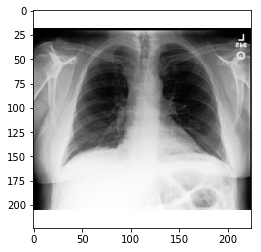

In [102]:
sample = d_mimic_chex[15011]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_mimic_chex.pathologies,sample["lab"]))

In [86]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

In [87]:
d_openi = xrv.datasets.Openi_Dataset(imgpath="/lustre03/project/6008064/jpcohen/OpenI/images",
                                    transform=transform)

In [88]:
d_openi

{'Atelectasis': {0.0: 2996, 1.0: 271},
 'Calcified Granuloma': {0.0: 3074, 1.0: 193},
 'Cardiomegaly': {0.0: 3082, 1.0: 185},
 'Edema': {0.0: 3217, 1.0: 50},
 'Effusion': {0.0: 3147, 1.0: 120},
 'Emphysema': {0.0: 3183, 1.0: 84},
 'Fibrosis': {0.0: 3250, 1.0: 17},
 'Fracture': {0.0: 3189, 1.0: 78},
 'Granuloma': {0.0: 2914, 1.0: 353},
 'Hernia': {0.0: 3226, 1.0: 41},
 'Infiltration': {0.0: 3201, 1.0: 66},
 'Lung Lesion': {0.0: 3264, 1.0: 3},
 'Lung Opacity': {0.0: 2940, 1.0: 327},
 'Mass': {0.0: 3261, 1.0: 6},
 'Nodule': {0.0: 3199, 1.0: 68},
 'Pleural_Thickening': {0.0: 3237, 1.0: 30},
 'Pneumonia': {0.0: 3199, 1.0: 68},
 'Pneumothorax': {0.0: 3253, 1.0: 14}}


Openi_Dataset num_samples=3267

{'Atelectasis': 0.0,
 'Calcified Granuloma': 0.0,
 'Cardiomegaly': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Fracture': 0.0,
 'Granuloma': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Lung Lesion': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Lung Opacity': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

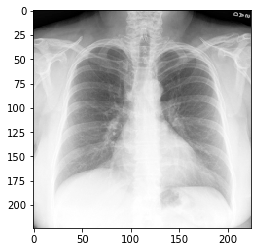

In [89]:
sample = d_openi[0]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_openi.pathologies,sample["lab"]))

In [70]:
pathologies = [  'Atelectasis',
                 'Consolidation',
                 'Infiltration',
                 'Pneumothorax',
                 'Edema',
                 'Emphysema',
                 'Fibrosis',
                 'Effusion',
                 'Pneumonia',
                 'Pleural_Thickening',
                 'Cardiomegaly',
                 'Nodule',
                 'Mass',
                 'Hernia',
                 'Lung Lesion',
                 'Fracture',
                 'Lung Opacity',
                 'Enlarged Cardiomediastinum'
                ]

In [72]:
print(d_nih.__class__)
xrv.datasets.relabel_dataset(pathologies, d_nih)
print(d_pc.__class__)
xrv.datasets.relabel_dataset(pathologies, d_pc)
print(d_chex.__class__)
xrv.datasets.relabel_dataset(pathologies, d_chex)

<class 'torchxrayvision.datasets.NIH_Dataset'>
Lung Lesion doesn't exist. Adding nans instead.
Fracture doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'torchxrayvision.datasets.PC_Dataset'>
Lung Lesion doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'torchxrayvision.datasets.CheX_Dataset'>
{'Support Devices', 'Pleural Other'} will be dropped
Infiltration doesn't exist. Adding nans instead.
Emphysema doesn't exist. Adding nans instead.
Fibrosis doesn't exist. Adding nans instead.
Pleural_Thickening doesn't exist. Adding nans instead.
Nodule doesn't exist. Adding nans instead.
Mass doesn't exist. Adding nans instead.
Hernia doesn't exist. Adding nans instead.


In [79]:
dd = xrv.datasets.Merge_Dataset([d_nih, d_pc, d_chex])

In [80]:
dd

{'Atelectasis': {0.0: 103094, 1.0: 16834},
 'Cardiomegaly': {0.0: 104528, 1.0: 15256},
 'Consolidation': {0.0: 114503, 1.0: 6311},
 'Edema': {0.0: 113345, 1.0: 15119},
 'Effusion': {0.0: 113503, 1.0: 23557},
 'Emphysema': {0.0: 92109, 1.0: 811},
 'Enlarged Cardiomediastinum': {0.0: 20506, 1.0: 5181},
 'Fibrosis': {0.0: 92008, 1.0: 912},
 'Fracture': {0.0: 75398, 1.0: 5915},
 'Hernia': {0.0: 91849, 1.0: 1071},
 'Infiltration': {0.0: 84878, 1.0: 8042},
 'Lung Lesion': {0.0: 14422, 1.0: 4217},
 'Lung Opacity': {0.0: 15675, 1.0: 30873},
 'Mass': {0.0: 91133, 1.0: 1787},
 'Nodule': {0.0: 89065, 1.0: 3855},
 'Pleural_Thickening': {0.0: 90081, 1.0: 2839},
 'Pneumonia': {0.0: 105494, 1.0: 5041},
 'Pneumothorax': {0.0: 125238, 1.0: 4678}}


Merge_Dataset num_samples=157454